In [10]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
%matplotlib inline
rcParams['figure.figsize']=7,4

In [12]:
iris=datasets.load_iris()
x=scale(iris.data)
y=pd.DataFrame(iris.target)
variable_names=iris.feature_names
x[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [13]:
clustring=KMeans(n_clusters=3,random_state=5)
clustring.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

Text(0.5,1,'kmeans')

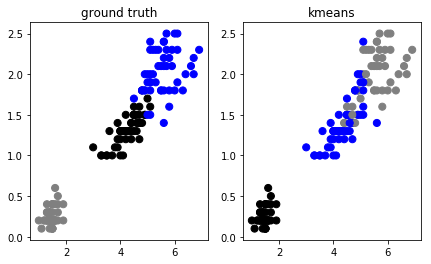

In [17]:

df=DataFrame(iris.data)
df.columns=['sepal_length','sepal_width','petal_length','petal_width']
y.columns=['target']
color_theme=np.array(['gray','black','blue'])
plt.subplot(1,2,1)
plt.scatter(x=df.petal_length,y=df.petal_width,c=color_theme[iris.target],s=50)
plt.title('ground truth')
plt.subplot(1,2,2)
plt.scatter(x=df.petal_length,y=df.petal_width,c=color_theme[clustring.labels_],s=50)
plt.title('kmeans')

Text(0.5,1,'kmeans')

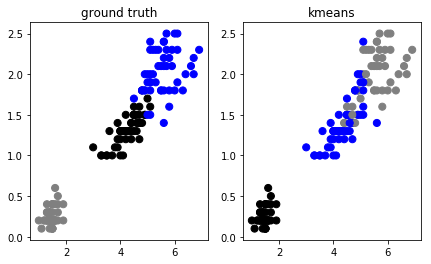

In [24]:
relabel=np.choose(clustring.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=df.petal_length,y=df.petal_width,c=color_theme[iris.target],s=50)
plt.title('ground truth')
plt.subplot(1,2,2)
plt.scatter(x=df.petal_length,y=df.petal_width,c=color_theme[clustring.labels_],s=50)
plt.title('kmeans')

In [25]:
print(classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

